In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.stats import norm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [14]:
#gaussian
mu = 0 
sigma = 0.5 # value of sigma

In [15]:
analytical = 2*sigma**4 #know result of the integral

In [16]:
def integral(mu, sigma, N):
    xi = np.abs(np.random.normal(mu, sigma, N))
    return np.sqrt(np.pi / 2) * sigma * np.mean(xi**3)

In [17]:
N_range = np.unique(np.logspace(0,6,100,dtype=int))

In [29]:
vals = [integral(mu, sigma, N) for N in tqdm(N_range)]

  0%|          | 0/92 [00:00<?, ?it/s]

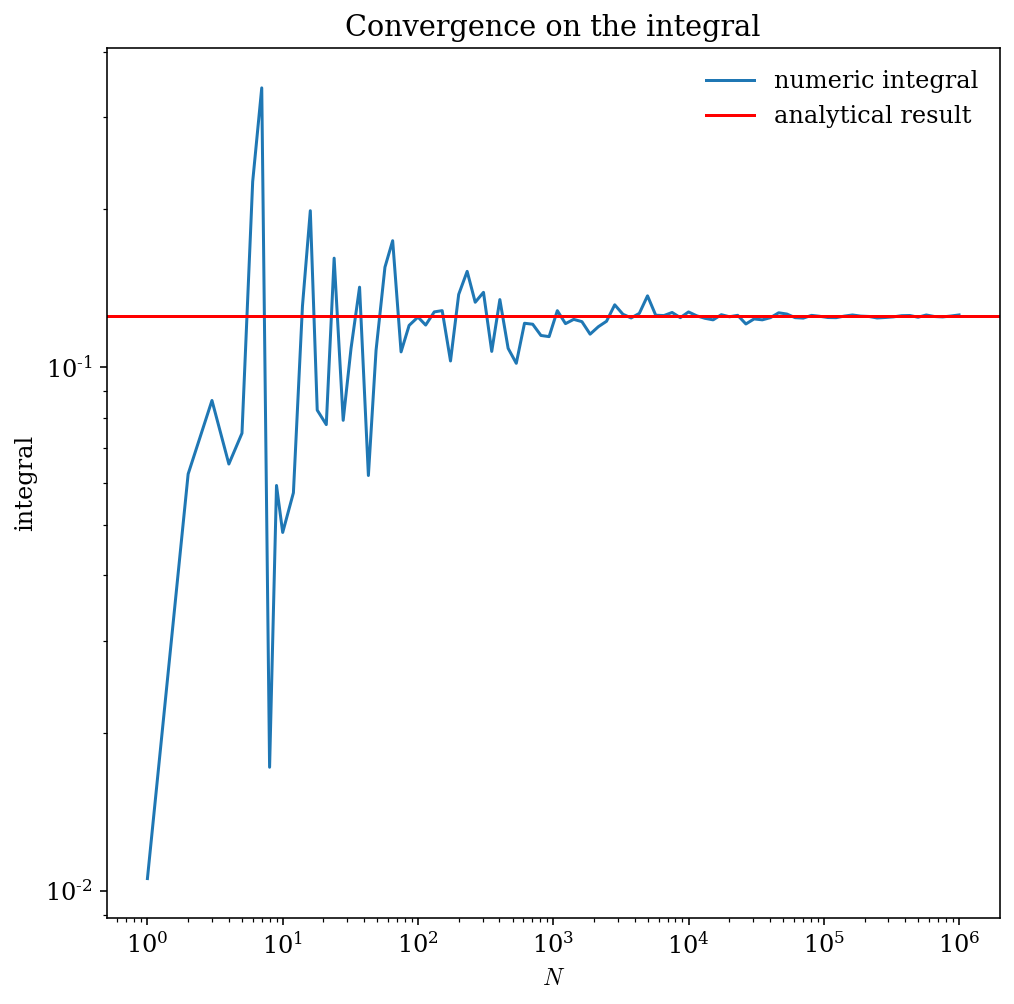

In [30]:
plt.plot(N_range, vals, label = 'numeric integral')
plt.axhline(analytical, c='r', label = 'analytical result')
plt.xlabel('$N$')
plt.ylabel('integral')
plt.title('Convergence on the integral')
plt.legend(frameon = False)
plt.loglog()
plt.show()

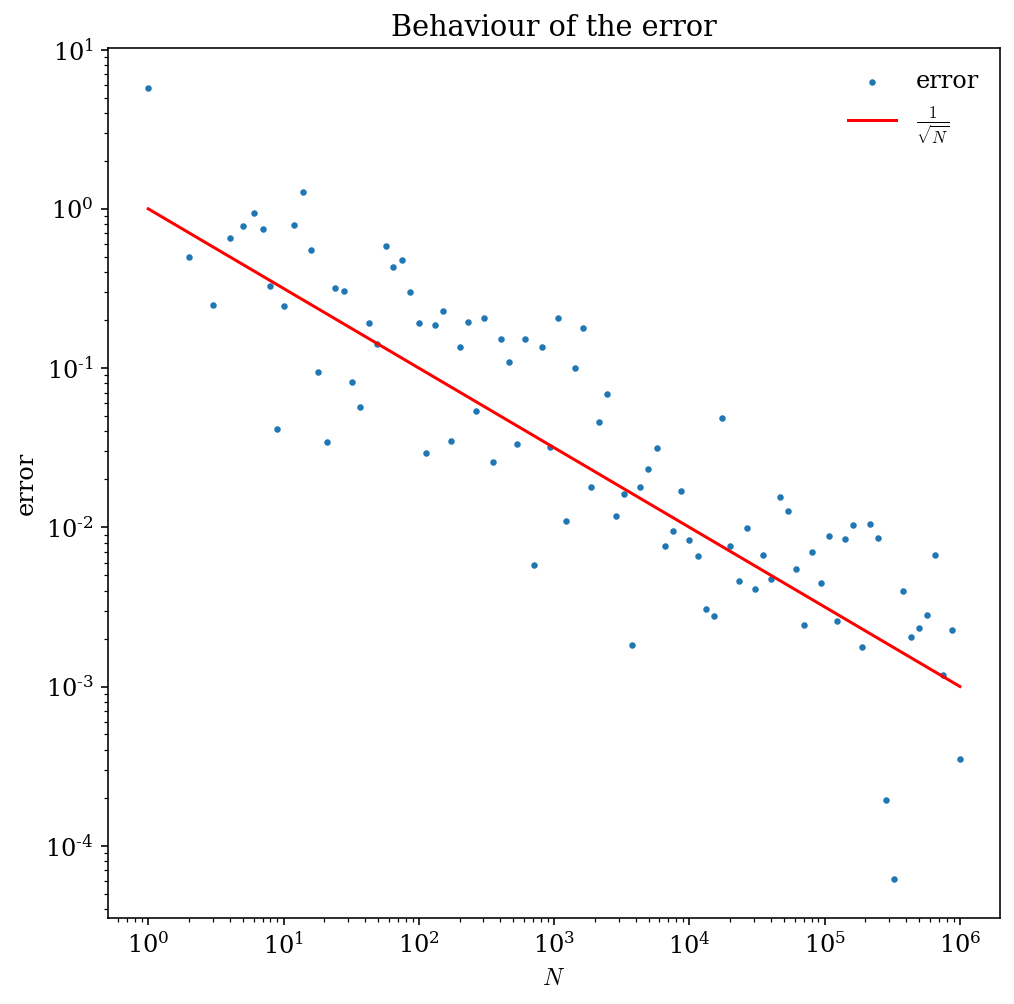

In [20]:
error = np.abs(np.array(vals) - analytical) / analytical

plt.scatter(N_range, error, s = 5, label = 'error')
plt.plot(N_range, N_range**(-0.5), c = 'r', label = r'$\frac{1}{\sqrt{N}}$')
plt.xlabel('$N$')
plt.ylabel('error')
plt.title('Behaviour of the error')
plt.legend(frameon = False)
plt.loglog()
plt.show()

In [58]:
N = int(1e3)
N_try = int(1e4)
integrals = [integral(mu, sigma, N) for i in tqdm(range(N_try))]

  0%|          | 0/10000 [00:00<?, ?it/s]

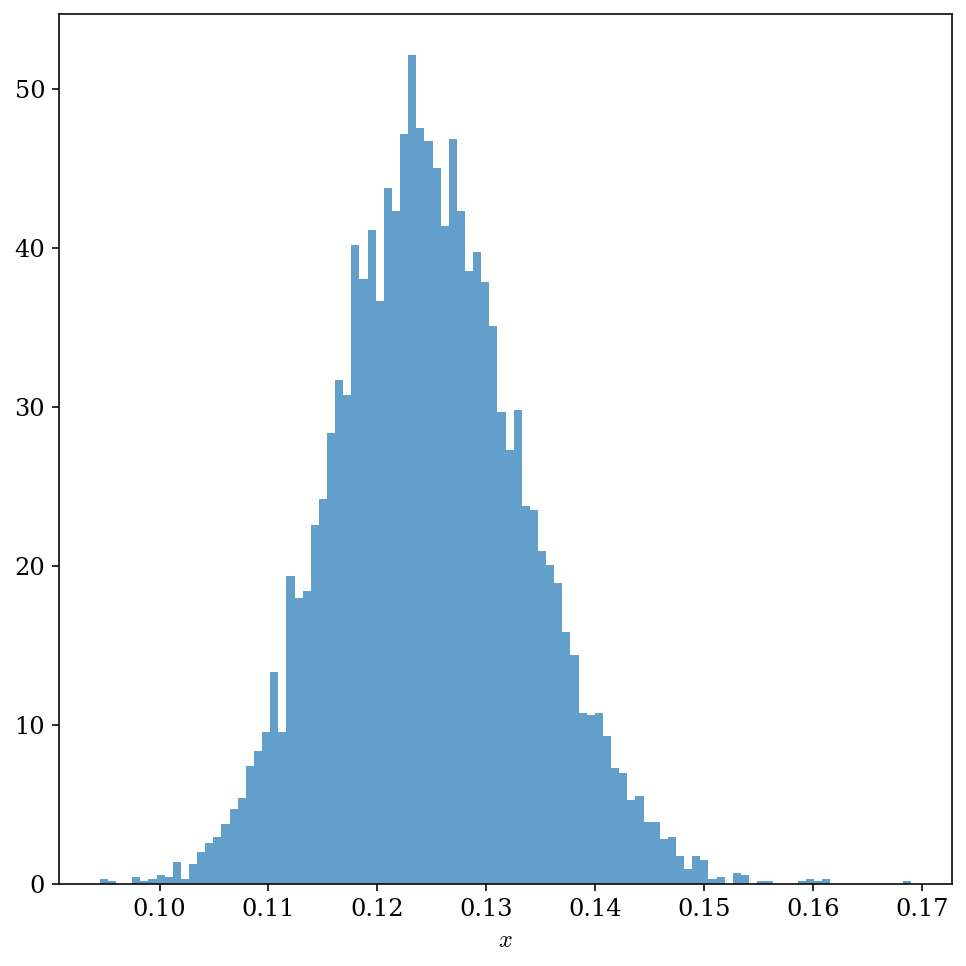

In [59]:
plt.hist(integrals, bins = 100, alpha = 0.7, density = True)
plt.xlabel(r"$x$")
plt.show()

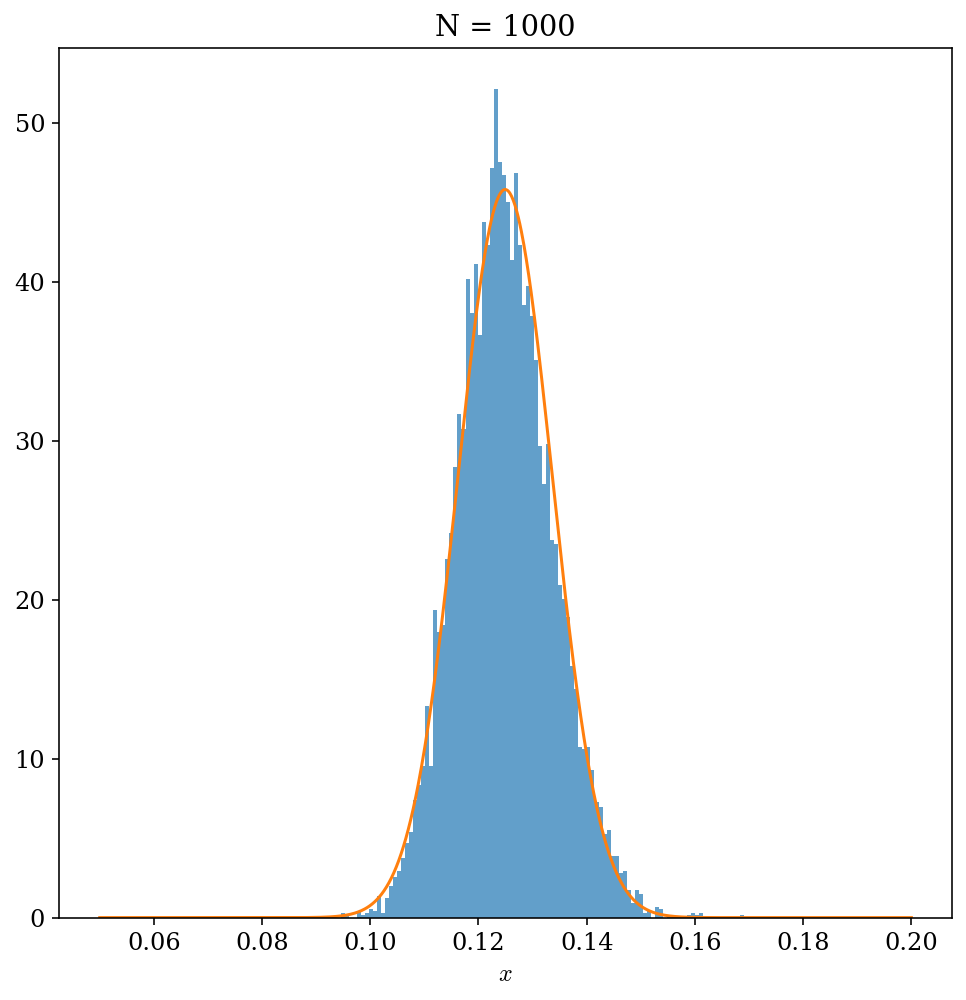

In [60]:
#'fit' a gaussian
mean = np.mean(integrals)
std = np.std(integrals, ddof = 1)

distr = norm(mean, std)
x_array = np.linspace(0.05, 0.2, 1000)

plt.hist(integrals, bins = 100, alpha = 0.7, density = True)
plt.plot(x_array, distr.pdf(x_array))
plt.xlabel(r"$x$")
plt.title('N = %.i' % N)
plt.show()

In [61]:
print('the standard deviation is: %.4f' % std)

the standard deviation is: 0.0087


In [62]:
N = int(1e4)
integrals = [integral(mu, sigma, N) for i in tqdm(range(N_try))]

  0%|          | 0/10000 [00:00<?, ?it/s]

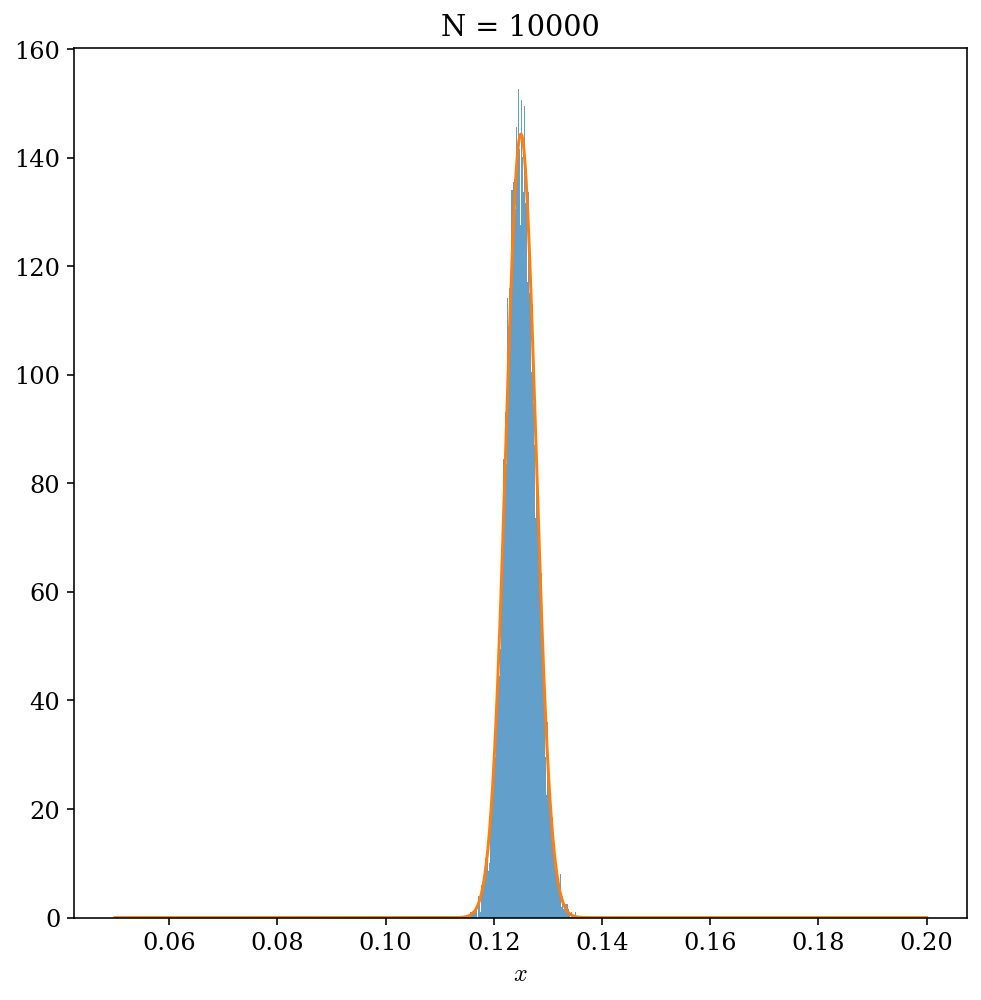

In [63]:
#'fit' a gaussian
mean = np.mean(integrals)
std = np.std(integrals, ddof = 1)

distr = norm(mean, std)
x_array = np.linspace(0.05, 0.2, 1000)

plt.hist(integrals, bins = 100, alpha = 0.7, density = True)
plt.plot(x_array, distr.pdf(x_array))
plt.xlabel(r"$x$")
plt.title('N = %.i' % N)
plt.show()

In [64]:
print('the standard deviation is: %.4f' % std)

the standard deviation is: 0.0028


Increasing $N$ the distribution becomes thinner, less broad